## Data Analysis with Python and Pandas

### Creating and Navigating a Dataframe

In [1]:
import pandas as pd

In [18]:
starting = {
    'col_1':[5,2,4,7,2,4],
    'col_2':[7,8,2,1,8,9],
    'col_3':[10,4,2,1,9,10],
    'Name':['HG','TY','CS','YU','PO','XW'],
    'col_4':[5,6,7,1,5,6],
    'col_5':[9,9,2,1,3,9],
    'col_6':[7,8,2,1,1,0]
}

df = pd.DataFrame(starting)
df

,col_1,col_2,col_3,Name,col_4,col_5,col_6
0,5,7,10,HG,5,9,7
1,2,8,4,TY,6,9,8
2,4,2,2,CS,7,2,2
3,7,1,1,YU,1,1,1
4,2,8,9,PO,5,3,1
5,4,9,10,XW,6,9,0


In [19]:
df.dtypes

col_1     int64
col_2     int64
col_3     int64
Name     object
col_4     int64
col_5     int64
col_6     int64
dtype: object

In [20]:
df['col_1'][2]

4

In [21]:
df.head(2)

,col_1,col_2,col_3,Name,col_4,col_5,col_6
0,5,7,10,HG,5,9,7
1,2,8,4,TY,6,9,8


In [22]:
df.tail(2)

,col_1,col_2,col_3,Name,col_4,col_5,col_6
4,2,8,9,PO,5,3,1
5,4,9,10,XW,6,9,0


In [30]:
df.index

Index(['HG', 'TY', 'CS', 'YU', 'PO', 'XW'], dtype='object', name='Name')

In [32]:
df.index

Index(['HG', 'TY', 'CS', 'YU', 'PO', 'XW'], dtype='object', name='Name')

In [27]:
df

,col_1,col_2,col_3,col_4,col_5,col_6
Name,,,,,,
HG,5,7,10,5,9,7
TY,2,8,4,6,9,8
CS,4,2,2,7,2,2
YU,7,1,1,1,1,1
PO,2,8,9,5,3,1
XW,4,9,10,6,9,0


### Visualising Pandas Dataframe

In [38]:
import pandas as pd
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

data = sns.load_dataset('car_crashes')
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


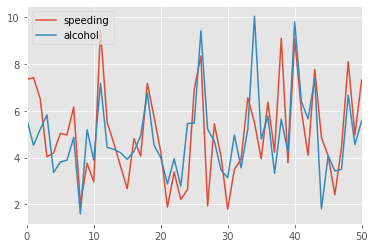

In [41]:
# data['speeding'].plot()
# data['alcohol'].plot()
data[['speeding','alcohol']].plot()
plt.legend()
plt.show()

In [44]:
data['speeding'].tolist()[-2]

4.968

In [46]:
data[['speeding','alcohol']].corr().iloc[1,0]

0.6697185644227317

### IO Operations - CSV

In [54]:
import pandas as pd
import datetime
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

data = sns.load_dataset('car_crashes')
data[['speeding','alcohol']].to_csv('speed_alcohol.csv')

In [59]:
data_sample = pd.read_csv('speed_alcohol.csv',index_col=0)
data_sample.head()

,speeding,alcohol
0,7.332,5.640
1,7.421,4.525
2,6.510,5.208
3,4.032,5.824
4,4.200,3.360


### IO Operations - HDF